## Los data frames 2

In [1]:
import pandas as pd #lo primero es llamar a pandas

In [2]:
movies_df = pd.read_csv("../../Datas_frames/imdb.csv", delimiter =",",decimal=".") 
movies_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


## Para confirmar si hay duplicados en un dataset

In [5]:
temp_df = movies_df #Primero hacemos una copia
temp_df.shape

(979, 6)

In [6]:
temp_df = movies_df.append(movies_df) #Luego se adherimos sobre si mismo
temp_df.shape

(1958, 6)

In [7]:
temp_df = temp_df.drop_duplicates()
#Luego usamos drop_duplicates, si el shape es igual a antes de que usamos append entonces no hay duplicados
temp_df.shape


(979, 6)

Another important argument for drop_duplicates() is keep, which has three possible options:
- first: (default) Drop duplicates except for the first occurrence.
- last: Drop duplicates except for the last occurrence.
- False: Drop all duplicates.

## inplace()
It's a little verbose to keep assigning DataFrames to the same variable like in this example. For this reason, pandas has the inplace keyword argument on many of its methods. Using inplace=True will modify the DataFrame object in place:

## Column cleanup

Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

Here's how to print the column names of our dataset:

In [8]:
movies_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Rename()
We can use the .rename() method to rename certain or all columns via a dict. We don't want parentheses, so let's rename those:

In [12]:
movies_df.rename(columns={
        'duration': 'duration (Minutes)' 
    }, inplace=True)


movies_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration (Minutes)',
       'actors_list'],
      dtype='object')

Excellent. But what if we want to uppercase all names? Instead of using .rename() we could also set a list of names to the columns like so:

In [15]:
movies_df.columns = ['Star_rating', 'Title', 'Content_rating', 'Genre', 'Duration',
       'Actors_list']

movies_df.columns

Index(['Star_rating', 'Title', 'Content_rating', 'Genre', 'Duration',
       'Actors_list'],
      dtype='object')

But that's too much work. Instead of just renaming each column manually we can do a list comprehension:

In [14]:
movies_df.columns = [col.capitalize() for col in movies_df]

movies_df.columns


Index(['Star_rating', 'Title', 'Content_rating', 'Genre', 'Duration (minutes)',
       'Actors_list'],
      dtype='object')

## Valores nulos o perdidos

When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's None or NumPy's np.nan, each of which are handled differently in some situations.

There are two options in dealing with nulls:

    Get rid of rows or columns with nulls
    Replace nulls with non-null values, a technique known as imputation

Let's calculate to total number of nulls in each column of our dataset. The first step is to check which cells in our DataFrame are null:

In [36]:
movies_df.isnull().sum()

Star_rating       0
Title             0
Content_rating    3
Genre             0
Duration          0
Actors_list       0
dtype: int64

#### dropna()
Remove nulls is pretty simple:

In [22]:
movies_df.dropna()

(979, 6)

Other than just dropping rows, you can also drop columns with null values by setting axis=1:

In [ ]:
movies_df.dropna(axis=1)

#### Impute
We'll impute the missing values of Content_rating using the mean. Here's the mean value:

In [83]:
Duration = movies_df['Duration']
Duration_mean = Duration.mean()
Duration.fillna(Duration_mean, inplace=True) #With the mean, let's fill the nulls using fillna():

## Extrayendo data de una columna

Using square brackets is the general way we select columns in a DataFrame.

If you remember back to when we created DataFrames from scratch, the keys of the dict ended up as column names. Now when we select columns of a DataFrame, we use brackets just like if we were accessing a Python dictionary.

In [81]:
Duration = movies_df['Duration']
Duration.head()

0    142
1    175
2    200
3    152
4    154
Name: Duration, dtype: object

#### describe()
Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [4]:
movies_df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [5]:
movies_df['genre'].describe() #Tambien puedes hacerlo por columna

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

#### .value_counts() 
can tell us the frequency of all values in a column:

In [6]:
movies_df['genre'].value_counts().head(10)

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Name: genre, dtype: int64

#### .corr() 
By using the correlation method we can generate the relationship between each continuous variable:

In [7]:
movies_df.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


Correlation tables are a numerical representation of the bivariate relationships in the dataset.

Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation.

So looking in the first row, first column we see rank has a perfect correlation with itself, which is obvious. On the other hand, the correlation between votes and revenue_millions is 0.6. A little more interesting.

## DataFrame slicing, selecting, extracting

This will return a Series. To extract a column as a DataFrame, you need to pass a list of column names. In our case that's just a single column:

In [9]:
subset = movies_df[['genre', 'duration']]

subset.head()

,genre,duration
0,Crime,142
1,Crime,175
2,Crime,200
3,Action,152
4,Crime,154


#### Conditional selections

We’ve gone over how to select columns and rows, but what if we want to make a conditional selection?

For example, what if we want to filter our movies DataFrame to show only films directed by Ridley Scott or films with a rating greater than or equal to 8.0?

To do that, we take a column from the DataFrame and apply a Boolean condition to it. Here's an example of a Boolean condition:

In [11]:
condition = (movies_df['genre'] == "Drama")

condition.head()

0    False
1    False
2    False
3    False
4    False
Name: genre, dtype: bool

Similar to isnull(), this returns a Series of True and False values: True for films directed by Ridley Scott and False for ones not directed by him.

We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films. To return the rows where that condition is True we have to pass this operation into the DataFrame:

In [14]:
movies_df[movies_df['genre'] == "Drama"].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."
32,8.6,Casablanca,PG,Drama,102,"[u'Humphrey Bogart', u'Ingrid Bergman', u'Paul..."
33,8.6,Whiplash,R,Drama,107,"[u'Miles Teller', u'J.K. Simmons', u'Melissa B..."


You can get used to looking at these conditionals by reading it like:

Select movies_df where movies_df director equals Ridley Scott.

Let's look at conditional selections using numerical values by fil

In [16]:
movies_df[movies_df['star_rating'] >= 8.6].head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


We can make some richer conditionals by using logical operators | for "or" and & for "and".

Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott:

In [18]:
movies_df[(movies_df['content_rating'] == 'R') | (movies_df['content_rating'] == 'PG-13')].tail()

,star_rating,title,content_rating,genre,duration,actors_list
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.

Using the isin() method we could make this more concise thoug

In [20]:
movies_df[movies_df['content_rating'].isin(['R', 'PG-13'])].tail()

,star_rating,title,content_rating,genre,duration,actors_list
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


Let's say we want all movies that have a duration between 80 and 120 minutes, have a star_rating above 8.0, but just the Action ones.

Here's how we could do all of that:

In [33]:
movies_df[
    ((movies_df['duration'] >= 120) & (movies_df['duration'] <= 200))
    & (movies_df['star_rating'] > 8.0)
    & (movies_df['genre'] == "Crime")
]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
40,8.5,The Green Mile,R,Crime,189,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
49,8.5,The Departed,R,Crime,151,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N..."
86,8.4,A Clockwork Orange,X,Crime,136,"[u'Malcolm McDowell', u'Patrick Magee', u'Mich..."
112,8.3,L.A. Confidential,R,Crime,138,"[u'Kevin Spacey', u'Russell Crowe', u'Guy Pear..."
115,8.3,Scarface,R,Crime,170,"[u'Al Pacino', u'Michelle Pfeiffer', u'Steven ..."


## Aplicando funciones

#### apply()
It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow.

An efficient alternative is to apply() a function to the dataset. For example, we could use a function to convert movies with an 8.0 or greater to a string value of "good" and the rest to "bad" and use this transformed values to create a new column.

First we would create a function that, when given a rating, determines if it's good or bad:

In [37]:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"
    
movies_df["rating_category"] = movies_df["star_rating"].apply(rating_function)

movies_df.head(10)

,star_rating,title,content_rating,genre,duration,actors_list,rating_category
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",good
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",good
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",good
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",good
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",good
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",good
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",good
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",good
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",good
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",good


In [38]:
#Tambien puedes usar lambda functions

movies_df["rating_category"] = movies_df["star_rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(10)

,star_rating,title,content_rating,genre,duration,actors_list,rating_category
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",good
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",good
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",good
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",good
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",good
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",good
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",good
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",good
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",good
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",good


## Graficando con Pandas

Let's plot the relationship between ratings and duration. All we need to do is call .plot() on movies_df with some info about how to construct the plot:

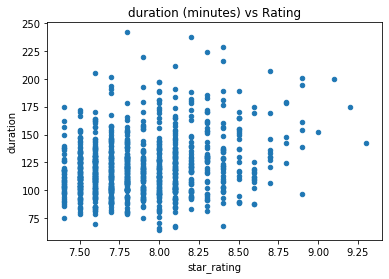

In [40]:
movies_df.plot(kind='scatter', x='star_rating', y='duration', title='duration (minutes) vs Rating');

If we want to plot a simple Histogram based on a single column, we can call plot on a column:

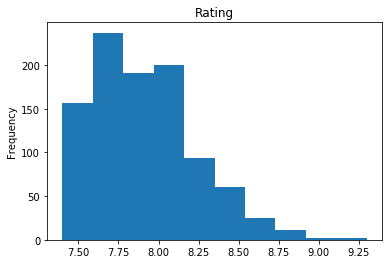

In [41]:
movies_df['star_rating'].plot(kind='hist', title='Rating');

Do you remember the .describe() example at the beginning of this tutorial? Well, there's a graphical representation of the interquartile range, called the Boxplot.

Using a Boxplot we can visualize this data:

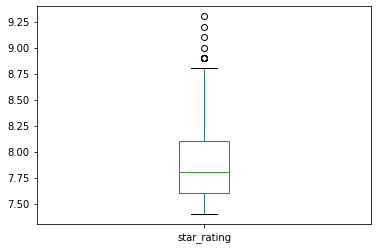

In [43]:
movies_df['star_rating'].plot(kind="box");

In [46]:
#Para entender de que se trata el cuadro anterior, ejecuta los siguientes comandos

from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open(r"../../box-plot-explained.gif")  

# This method will show image in any image viewer  
im.show()  

By combining categorical and continuous data, we can create a Boxplot of revenue that is grouped by the Rating Category we created above:

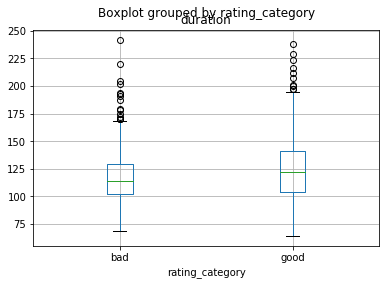

In [47]:
movies_df.boxplot(column='duration', by='rating_category');